Jenifer Alondra Ocaña Miranda

#Evaluacion 2

In [ ]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
from scipy import integrate, linalg

La ecuacion diferencial del oscilador amortiguado es 

$$\frac{d^2x}{dt^2}+2\zeta w_n\frac{dx}{dt}+w_n^2x=\frac{1}{m}F_0 sin(wt)$$

Donde 

$$w_n=\sqrt{\frac{k}{m}}$$ frecuencia angular natural del oscilador de masa m y constante k


$$\zeta=\frac{c}{2\sqrt{mk}}$$ 
a su vez $c=$ Coeficiente de viscosidad

El lado derecho de la ecuacion diferencial es un termino de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $w(w\neq w_n)$




El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

*Movimiento sobreamortiguado ($\zeta \gt
1$). El sistema decae exponencialmente al estado estacionario sin oscilar.


*Críticamente amortiguado ($\zeta = 1$).


*Movimiento subamortiguado ($\zeta \lt  1$). Movimiento periódico que decae exponencialmente.


*Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.


##Problema 1

Resuelva numerica primero el caso de un oscilador amortiguado caso sin forzamiento 

$$\zeta \neq 0$$
$$F_0=0$$
$$m=1$$
$$k=9$$
Condiciones iniciales
$$x(0)\lt0$$ 
$$x'(0)=0$$


Podemos escribir la ecuacion 
$$\frac{d^2x}{dt^2}+2\zeta w_n\frac{dx}{dt}+w_n^2x=\frac{1}{m}F_0 sin(wt)$$
como dos ecuaciones de primer grado

$$\frac{dx}{dt}=x_1$$
$$\frac{dx_1}{dt}=\frac{1}{m}F_0 sin(wt)-2\zeta w_n x_1 -w_n^2x$$
Que en orden
\begin{matrix}
\frac{dx}{dt}=& &x_1& \\
\frac{dx_1}{dt}=&-w_n^2 \ x&-2\zeta w_n \ x_1 &+\frac{1}{m}F_0 sin(wt)
\end{matrix}



De modo que el sistema queda 
$$\vec{x}=\begin{bmatrix}x \\ x_1 \end{bmatrix}$$
\begin{equation}
\frac{\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
x \\
x_1 
\end{bmatrix}=
\begin{bmatrix}
0 & 1 \\
-w_n^2 & -2\zeta w_n 
\end{bmatrix}
\begin{bmatrix}
x \\
x_1 
\end{bmatrix}
+\begin{bmatrix}
0 \\
\frac{1}{m}F_0sin(wt) 
\end{bmatrix}
\end{equation}

Este es un sistema no homogeneo 


In [ ]:

def dxdt (X,t=0):
  return np.array([0*X[0]+1*X[1],
                   -1*wn**2*X[0]-2*zeta*wn*X[1]+(1/m)*f0*np.sin(w*t) ])


<Figure size 432x288 with 0 Axes>

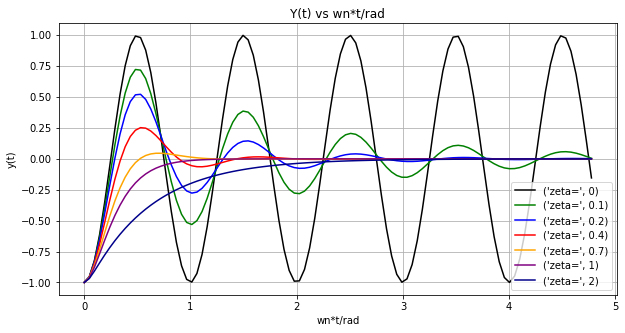

'Integration successful.'

In [ ]:
#Para este ejercicio 
#zeta yo lo escojo
f0=0
m=1
k=9
#w puede valer lo que sea no importa ya que f0 es 0
w=1
wn=np.sqrt(k/m)


#Condiciones iniciales
#Es de la forma
#X0=np.array([  x < 0 ,0])
y0=np.array([-1,0])
t=np.linspace(0,10,100)

fig = plt.figure()
plt.figure(figsize=(10,5))
col=['k','green','b','r','orange','purple','darkblue']
for zeta,col in zip([0,0.1,0.2,0.4,0.7,1,2],col):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T
  ejx=(wn*t)/(2*np.pi)
  label='zeta=',zeta
  plt.plot(ejx,y,label=label,color=col)
  
plt.xlabel('wn*t/rad')
plt.legend(loc='best');
plt.ylabel('y(t)')
plt.grid();
plt.title('Y(t) vs wn*t/rad')
plt.show();
infodict['message']

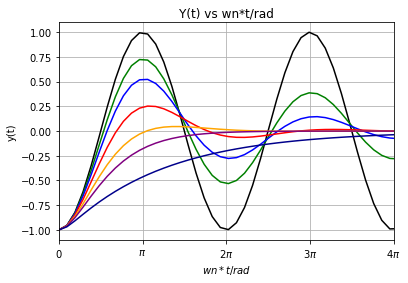

'Integration successful.'

In [ ]:
col=['k','green','b','r','orange','purple','darkblue']
for zeta,col in zip([0,0.1,0.2,0.4,0.7,1,2],col):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T
  ejx=(wn*t)/(2*np.pi)
  label='zeta=',zeta
  plt.plot(ejx,y,label=label,color=col)
  
plt.xlabel('$wn*t/rad$')
plt.xticks([0,0.5,1,1.5,2],[r'$0$',r'$\pi$',r'$2\pi$',r'$3\pi$',r'$4\pi$',])

plt.ylabel('y(t)')
plt.grid();
plt.title('Y(t) vs wn*t/rad')
plt.xlim(0,2)
plt.show();
infodict['message']

Tiene esta forma para valores negativos como dice la isntruccion sin embargo, no pasa por las mismas y ya que el tiempo esta expresado de forma distinta como vemos en el eje x.

##Problema 2

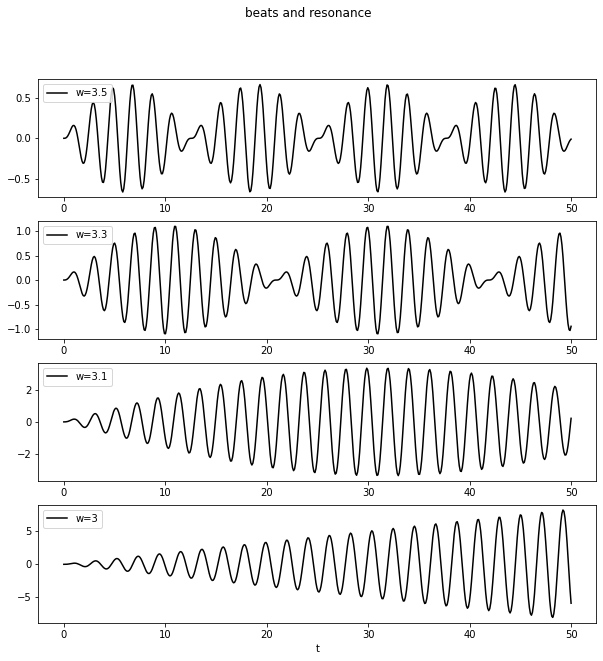

'Integration successful.'

In [ ]:
##Problema 2
#Para este ejercicio 
zeta=0
f0=1
m=1
k=9
wn=np.sqrt(k/m)
#w va a variar

#Condiciones iniciales

y0=np.array([0,0])
t=np.linspace(0,50,500)

fig, axs=plt.subplots(4,sharex=False)
fig.set_size_inches(10,10)

for w,i in zip([3.5,3.3,3.1,3],[0,1,2,3]):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T
  
  axs[i].plot(t,y,color='k',label='w='+str(w))
  axs[i].legend(loc='upper left')
  

plt.xlabel('t')
fig.suptitle('beats and resonance')
plt.show();
infodict['message']

##Problema 3


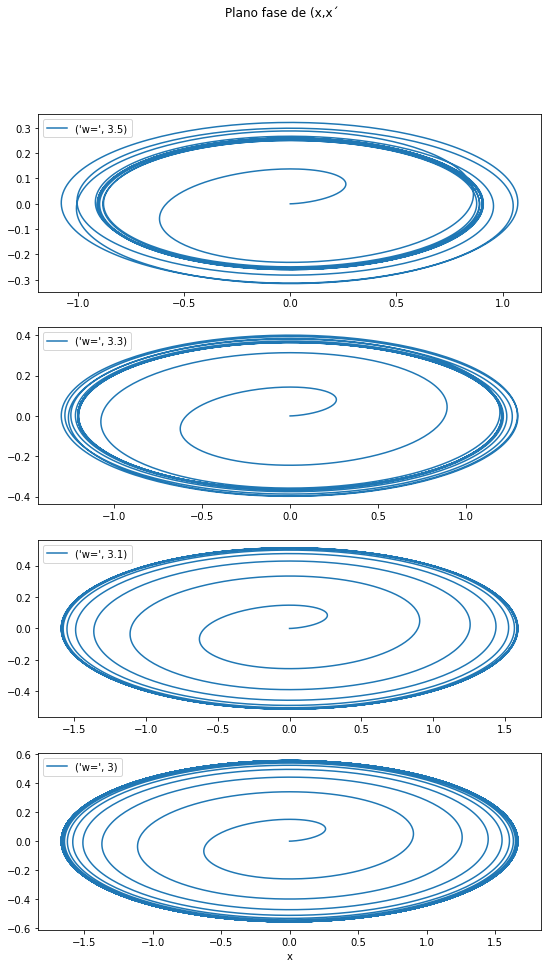

'Integration successful.'

In [ ]:
##Problema 2
#Para este ejercicio 
zeta=0.1
f0=1
m=1
k=9
wn=np.sqrt(k/m)
#w va a variar

#Condiciones iniciales

y0=np.array([0,0])
t=np.linspace(0,50,5000)

fig, axs=plt.subplots(4,sharex=False)
fig.set_size_inches(9,15)

for w,i in zip([3.5,3.3,3.1,3],[0,1,2,3]):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T #Y es la solucion de z y x es la de x'
  label='w=',w
  axs[i].plot(x,y,label=label)
  axs[i].legend(loc='upper left')
  

plt.xlabel('x')
fig.suptitle('Plano fase de (x,x´')
plt.show();
infodict['message']